# Example 10.4 Cantilever beam subjected to stochastic load

We consider a cantilever beam subjected to a distributed stochastic load $q(x,t)$.

<img src="./figures/Cantilever.svg">

We neglect all dynamic effects, which means that we assume that the natural frequency of the structure is well above the frequency content of the loading. We assume that the load is a stationary and homogeneous process and that the following cross-correlation function applies:

$$ R_q(\tau,\Delta x) = E \left[ q(t,x) q(t+\tau,x+\Delta x)  \right] = \exp \left(-|\tau|\right) \exp \left(-K \dfrac{|\Delta x|}{L}\right) $$

Set $K=10$ and $L=10$ m.

## Question 1: Calculate the auto-correlation function of the bending moment at the support

The bending moment at the support can be obtained by summing all contriution along the beam

$$M(t) = \int_{0}^{L} q(x,t) x 	 \:  \text{d}x$$

The auto-correlation function is defined as

$$E\left[M(t) M (t+\tau) \right] = E\left[\int_{0}^{L}\int_{0}^{L} x_1 q(x,t) q(x+\Delta x,t+\tau) x_2\: \:  \text{d}x_1 	\: \:  \text{d}x_{2}\right ] $$

$$E\left[M(t) M (t+\tau) \right] = \int_{0}^{L}\int_{0}^{L} x_1 E\left[ q(x,t) q(x+\Delta x,t+\tau) \right ]x_2\: \:  \text{d}x_1\: \:  \text{d}x_{2} $$

$$E\left[M(t) M (t+\tau) \right] = \int_{0}^{L}\int_{0}^{L} x_1 R_q(\tau,\Delta x) x_2\: \:  \text{d}x_1\: \:  \text{d}x_{2} $$

$$E\left[M(t) M (t+\tau) \right] = \exp \left(-|\tau|\right) \int_{0}^{L}\int_{0}^{L} x_1 \exp \left(-K \dfrac{|\Delta x|}{L} \right) x_2\: \:  \text{d}x_1\: \:  \text{d}x_{2} $$

A double integral thus gives the auto-correlation function. We need to include the effect of the variance and covariance of the distributed load in all points along the beam. This is the reason for the double integral. We will plot the integrand below. 

### Plot the integrand

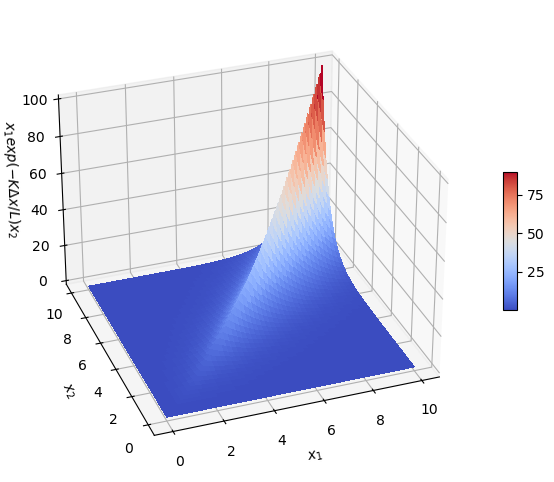

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

L = 10.0 # Beam length

K=10

x1 = np.linspace(0,L,500)
x2 = np.linspace(0,L,500)

integrand = np.zeros((x1.shape[0],x2.shape[0]))

for k1 in range(x1.shape[0]):
    for k2 in range (x2.shape[0]):
        integrand[k1,k2] = x1[k1]*x2[k2]*np.exp(-K*np.abs(x1[k1]-x2[k2])/L)
        
# Plot integrand
x1p, x2p = np.meshgrid(x1, x2)
x3p = integrand

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,6))

surf = ax.plot_surface(x1p, x2p, x3p.T, cmap=cm.coolwarm,linewidth=0.1, antialiased=False)
ax.view_init(30,250)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$');
ax.set_zlabel(r'$x_1 exp(-K \Delta x/L)x_2$');

fig.colorbar(surf, shrink=0.3, aspect=10)



The plot above shows the integrand. The diagonal elements show the contribution from each point's variance, while the off-diagonal elements show the contribution from the covariance between each point along the beam. As expected, the load acting at the tip of the beam contributes most to the auto-correlation. We can also see that the covariance and thus the contribution from the covariance between loads with significant distance is low.

### Calculate the integral and plot the auto-correlation functon

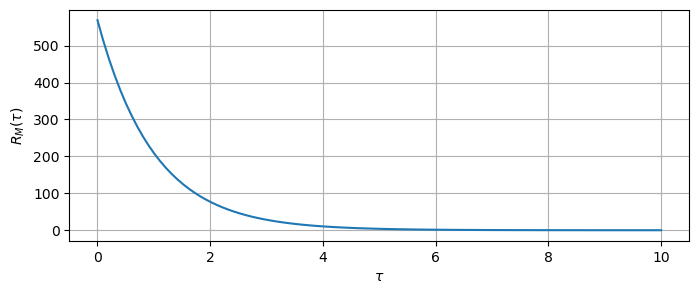

In [2]:
tau = np.linspace(0,10,100)
R = np.exp(-np.abs(tau))*np.trapz(np.trapz(integrand,x1,axis = 1),x2)

plt.figure(figsize=(8,3))    
plt.plot(tau,R)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_M(\tau)$')
plt.grid()


The variance of the moment is given by:

$$\sigma_M^2=E\left[M(t) M (t) \right]= R_M(\tau=0)$$

Calculate the variance and see how it varies with different values of the constant $K$.

In [3]:
print('Sigma_M_squared=' + str(round(R[0]*100)/100) + ' (Nm)^2')


Sigma_M_squared=568.68 (Nm)^2
